# Matrix Representation of the Rubik's Cube

Hello, the goal of the notebook is to mathematically represent a Rubik's Cube configuration using matrices. Our goal is to seek a linear representation of the Rubik's Cube Group $G$ and thus invoke tools from representation theory to understand $G.$

In [1]:
from sympy import *
import numpy as np
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from IPython.display import Image
PATH = os.getcwd()
init_printing(use_unicode=True)

We give an image of the Rubik's Cube in its standard configuration. 


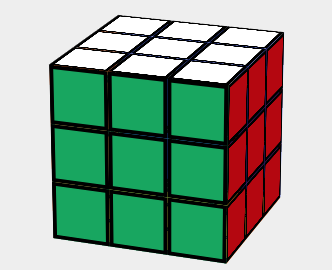

In [2]:
Image(filename = PATH + "/Cube.png", width=300, height=300)

We begin by labeling the $6$ sides of the cube as $\textit{F, L, U, B, R, D}$ which stand for the front side, left side, top side, back side, right side, and bottom side, respectively. We identify each side $A$ with the matrix 
$\begin{bmatrix} A_{i,j} \end{bmatrix}_{i,j=0}^{2}.$ Each entry $A_{i,j} \in \lbrace \text{g,o,w,b,r,y} \rbrace$ corresponds to the color of the $(i,j)$-th square. The matrices $\text{F, L, U, B, R, D}$ are together viewed as a $\textbf{cube configuration}.$ In particular, the $\textbf{identity configuration}$ is the particular configuration where $\text{F}$ has all entries $\text{g, }$ $\text{L}$ has all entries $\text{o, }$ $\cdots \ , $ and  $\text{D}$ has all entries $\text{y .}$ 

We define $\textbf{A}$ to stand for the operation to rotate side $A$  clockwise relative to how one sees the side $A.$ Similarly, we define $\textbf{A}'$ to stand for the operation to rotate side $A$ counterclockwise.

In [3]:
def face_names():
    return ['F','L','U','B','R','D']
def colors():
    return ['g','o','w','b','r','y']
def move_names():
    cw_moves=['F','L','U','B','R','D']
    ccw_moves=[str(i)+"'" for i in cw_moves]
    return cw_moves+ccw_moves

# Configurations

In this notebook, all configurations are in the form of a dictionary. The keys are the side names, and the values are their corresponding matrices.

The 'generic_config' method returns a configuration, where the side matrices have all distinct entries from $1$ to $54.$ I have used it to primarily compare results of code to results from real life.

In [4]:
def generic_config():
    keys=face_names()
    values=[Matrix([list(range(9*j+1,9*j+10))]).reshape(3,3) for j in range(6)]
    return copy.deepcopy(dict(zip(keys,values)))   

The 'custom_config' method below returns a configuration, where the side matrices have customized entries. For example, one may choose to put in color strings as entries. The 'identity()' method returns the identity configuration. Do $\textbf{not}$ change the 'reverse_matrix()' method; the other methods depend on it.

In [5]:
def custom_config(front,left,up,back,right,down):
    keys=face_names()
    values=[front,left,up,back,right,down]
    return dict(zip(keys,values))

def identity():
    keys=face_names()
    values=[Matrix([[i for j in range(9)]]).reshape(3,3) for i in colors()]
    return dict(zip(keys,values))

def reverse_matrix():
    return Matrix([[0,0,1],[0,1,0],[1,0,0]])


Here is an example of setting up a custom configuration.

In [6]:
front=Matrix([['y','g','y'],['g','y','r'],['r','w','g']])
left=Matrix([['o','r','b'],['w','r','w'],['y','o','g']])
back=Matrix([['r','y','b'],['o','w','r'],['o','w','b']])
right=Matrix([['g','y','w'],['g','o','b'],['w','y','g']])
up=Matrix([['w','r','b'],['b','b','b'],['o','o','o']])
down=Matrix([['y','b','r'],['y','g','g'],['r','o','w']])

test_config=custom_config(front,left,up,back,right,down)

The 'display' method returns a net diagram of how the cube configuration would look in real life. We give an example of the 'test_config' defined above.

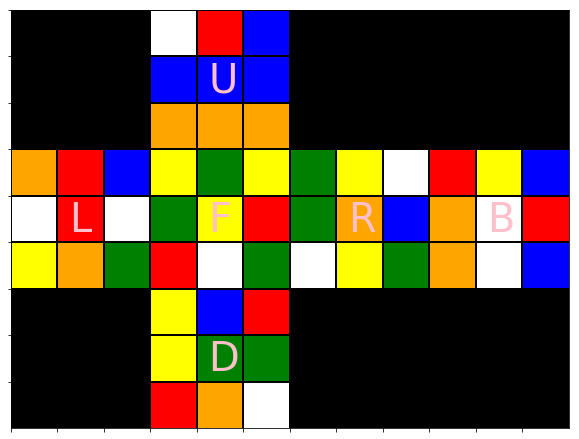

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint

def display(config,use_colors=True,figsize=(10,10)):
    c_dict=dict(zip(colors(),range(6)))
    if(use_colors):
        F,L,U,B,R,D=[np.array([c_dict[str(item)] for item in config[face]]).reshape(3,3).astype(int) for face in face_names()]
    else:
        F,L,U,B,R,D=[np.array([item for item in config[face]]).reshape(3,3).astype(int) for face in face_names()]
    grid=np.concatenate((L,F,R,B),axis=1)
    top=np.concatenate((6*np.ones([3,3]), U,6*np.ones([3,3]),6*np.ones([3,3])),axis=1)
    bottom=np.concatenate((6*np.ones([3,3]), D,6*np.ones([3,3]),6*np.ones([3,3])),axis=1)
    grid=np.concatenate((top,grid,bottom))
    if (use_colors):
        fig,ax=plt.subplots(figsize=figsize)
        cmap = mpl.colors.ListedColormap(['green', 'orange','white','blue','red','yellow','black'], name='colors')
        ax.imshow(grid, cmap=cmap,vmin=0,vmax=7)
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax.set_xticks(np.arange(-0.5, 11.5, 1));ax.set_yticks(np.arange(-0.5, 8.5, 1));
        ax.text(0.75, 4.25,'L',size=40,color='pink'); ax.text(3.75, 4.25,'F',size=40,color='pink'); 
        ax.text(6.75, 4.25,'R',size=40,color='pink'); ax.text(9.75, 4.25,'B',size=40,color='pink');
        ax.text(3.75, 1.25,'U',size=40,color='pink'); ax.text(3.75, 7.25,'D',size=40,color='pink');
        ax.set_xticklabels([]); ax.set_yticklabels([]);
        plt.close('all')
        return fig
    else:
        print(str(grid.astype(int)).replace("6  6  6",len("6  6  6")*" "))
# front=Matrix([['y','g','y'],['g','y','r'],['r','w','g']])
# left=Matrix([['o','r','b'],['w','r','w'],['y','o','g']])
# back=Matrix([['r','y','b'],['o','w','r'],['o','w','b']])
# right=Matrix([['g','y','w'],['g','o','b'],['w','y','g']])
# up=Matrix([['w','r','b'],['b','b','b'],['o','o','o']])
# down=Matrix([['y','b','r'],['y','g','g'],['r','o','w']])
display(test_config)

# Movements

The six methods below simulate rotations as described above.

In [9]:
def L(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,down_modified,back_modified,up_modified=[i.copy() for i in [front,down,back,up]]
    M=reverse_matrix()
    
    left_modified=left.T*M
    
    front_modified[:,0]=up[:,0] 
    down_modified[:,0]=front[:,0]
    back_modified[:,-1]=M*down[:,0]
    up_modified[:,0]=M*back[:,-1]
    
    keys=face_names()
    values=front_modified,left_modified,up_modified,back_modified,right,down_modified
    return dict(zip(keys,values))

In [10]:
def R(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,down_modified,back_modified,up_modified=[i.copy() for i in [front,down,back,up]]
    M=reverse_matrix()
    
    right_modified=right.T*M
    
    front_modified[:,-1]=down[:,-1] 
    up_modified[:,-1]=front[:,-1]
    back_modified[:,0]=M*up[:,-1]
    down_modified[:,-1]=M*back[:,0]
    
    keys=face_names()
    values=front_modified,left,up_modified,back_modified,right_modified,down_modified
    return dict(zip(keys,values))


In [11]:
def F(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    up_modified,right_modified,down_modified,left_modified=[i.copy() for i in [up,right,down,left]]
    M=reverse_matrix()
    
    front_modified=front.T*M
    
    up_modified[-1,:]=left[:,-1].T*M 
    right_modified[:,0]=up[-1,:].T
    down_modified[0,:]=right[:,0].T*M
    left_modified[:,-1]=down[0,:].T
    
    keys=face_names()
    values=front_modified,left_modified,up_modified,back,right_modified,down_modified
    return dict(zip(keys,values))

In [12]:
def B(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    up_modified,right_modified,down_modified,left_modified=[i.copy() for i in [up,right,down,left]]
    M=reverse_matrix()
    
    back_modified=back.T*M
    
    up_modified[0,:]=right[:,-1].T
    left_modified[:,0]=M*up[0,:].T
    down_modified[-1,:]=left[:,0].T
    right_modified[:,-1]=M*down[-1,:].T
    
    keys=face_names()
    values=front,left_modified,up_modified,back_modified,right_modified,down_modified
    return dict(zip(keys,values))


In [13]:
def U(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,left_modified,back_modified,right_modified=[i.copy() for i in [front,left,back,right]]
    M=reverse_matrix()
    up_modified=up.T*M
    
    front_modified[0,:]=right[0,:]
    left_modified[0,:]=front[0,:]
    back_modified[0,:]=left[0,:,]
    right_modified[0,:]=back[0,:,]
    
    keys=face_names()
    values=front_modified,left_modified,up_modified,back_modified,right_modified,down
    return dict(zip(keys,values))

In [14]:
def D(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,left_modified,back_modified,right_modified=[i.copy() for i in [front,left,back,right]]
    M=reverse_matrix()
    down_modified=down.T*M
    
    front_modified[-1,:]=left[-1,:]
    right_modified[-1,:]=front[-1,:]
    back_modified[-1,:]=right[-1,:]
    left_modified[-1,:]=back[-1,:]
    
    keys=face_names()
    values=front_modified,left_modified,up,back_modified,right_modified,down_modified
    return dict(zip(keys,values))


The 'rotate' method below accepts a move name as a string and a configuration. It then returns the resulting configuration upon doing the rotation. The 'rotate_sequence' accepts a list of move names and returns the final configuration upon doing the series of moves in the order presented by the list. The other methods were used for debugging. We give an example on our 'test_config' if one were to do $\textbf{F}$ once, twice, and thrice.

In [15]:
def rotate(move,config=generic_config()):
    if(len(move)==0 or move is None):
        return config
    move_dict={'L':L(config),
               'R':R(config),
               'U':U(config),
               'D':D(config),
               'F':F(config),
               'B':B(config),
               
               "L'":L(L(L(config))),
               "R'":R(R(R(config))),
               "U'":U(U(U(config))),
               "D'":D(D(D(config))),
               "F'":F(F(F(config))),
               "B'":B(B(B(config))),
              }
    return move_dict[move]

def rotate_sequence(moves,config=generic_config()):
    final_config=config
    moves=moves.split(" ")
    for move in moves:
        final_config=rotate(move,final_config)
    return final_config



The methods below were used for debugging.


In [16]:
def get_rotating_faces(move):
    rotating_face_dict={'D': ['F','R','B','L'],
                        'U': ['F','L','B','R'],
                        'B': ['U','L','D','R'],
                        'F':['U','R','D','L'],
                        'R':['F','U','B','D'],
                        'L':['F','D','B','U']}
    return rotating_face_dict[move]

def test_move(move,config=generic_config()):
    print(get_rotating_faces(move))
    print(rotate_sequence(4*[move],config)==rotate_sequence(0*[move],config))
    return [rotate_sequence(i*[move],config)[get_rotating_faces(move)[i]] for i in range(4)]

In [17]:
def get_map(move):
    original=[rotate_sequence("",generic_config())[key] for key in face_names()]
    new=[rotate_sequence(move,generic_config())[key] for key in face_names()]
    tuples=[(original[k][i,j],new[k][i,j]) for k in range(6) for i in range(2) for j in range(2)]
    return dict([i for i in tuples if i[0]!=i[1]])

In [18]:
display(generic_config(),False)

[[         19 20 21                  ]
 [         22 23 24                  ]
 [         25 26 27                  ]
 [10 11 12  1  2  3 37 38 39 28 29 30]
 [13 14 15  4  5  6 40 41 42 31 32 33]
 [16 17 18  7  8  9 43 44 45 34 35 36]
 [         46 47 48                  ]
 [         49 50 51                  ]
 [         52 53 54                  ]]


In [20]:
display(rotate_sequence("L",generic_config()),False)

[[         36 20 21                  ]
 [         33 23 24                  ]
 [         30 26 27                  ]
 [16 13 10 19  2  3 37 38 39 28 29 52]
 [17 14 11 22  5  6 40 41 42 31 32 49]
 [18 15 12 25  8  9 43 44 45 34 35 46]
 [          1 47 48                  ]
 [          4 50 51                  ]
 [          7 53 54                  ]]
